In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl

In [2]:
#Reading in data, here I have two csv files containing records from different dates
df1=pd.read_csv('C:/Users/Rory/Downloads/price_paid_records.csv',index_col = 'Transaction unique identifier')
df1['Date of Transfer'] = pd.to_datetime(df1['Date of Transfer'])
df2=pd.read_csv('C:/Users/Rory/Downloads/ppd_data.csv',index_col = 'unique_id')
df2['deed_date']=pd.to_datetime(df2['deed_date'])
df2=df2.rename(columns={"price_paid":"Price", "deed_date":"Date","property_type":"Type"})
df1=df1.rename(columns={"Date of Transfer":"Date","Property Type":"Type"})

In [4]:
#Removing all house sales not in Cardiff
notcardiff=df1[df1['County']!='CARDIFF'].index
df1.drop(notcardiff, inplace=True)
(df1['County']== 'CARDIFF').value_counts()

True    134115
Name: County, dtype: int64

In [5]:
#Removing all property sales which are not terrace houses
notterrace1=df1[df1['Type']!='T'].index
df1.drop(notterrace1, inplace=True)
notterrace2=df2[df2['Type']!='T'].index
df2.drop(notterrace2, inplace=True)

In [6]:
# Now since all property sales are in Cardiff and terrace houses, we can drop all columns but price and date
df1=df1[['Price','Date']]
df1['Date2']=df1['Date']
df1.index.name='index_no'
df2=df2[['Price','Date']]
df2['Date2']=df2['Date']
df2.index.name='index_no'

In [7]:
# Concatenating both dataframes into a single dataframe 
df=pd.concat([df1,df2])
df.index.drop_duplicates(keep=False)

Index(['{742E87B7-5134-487D-8370-1E456AACB593}',
       '{D32149A0-38C6-4941-B288-423F13479616}',
       '{24DF25B8-94E7-41A3-9356-554B70405C36}',
       '{CB8C758E-8EE7-4B8B-88CA-58C34A33B833}',
       '{0DB1DE63-226D-4A0B-867A-58C5E8336201}',
       '{84FB5E9C-FB74-4E3B-9C65-4E1C9CD714AC}',
       '{DA7FDF0F-B10E-47F8-8845-1AC28A2EF0B9}',
       '{0F86AD6A-62B8-45C2-ACA5-4E21B52A7EAA}',
       '{0CA93971-A3D7-48FC-9D48-1AC7292070D6}',
       '{DCAB95E3-F0E5-4793-A7F4-58CEE8F65028}',
       ...
       '79A74E21-4D55-1289-E053-6B04A8C01627',
       '64342BFD-ED2C-422C-E053-6C04A8C0FB8A',
       '64342BFD-EC7A-422C-E053-6C04A8C0FB8A',
       'AC07BBCF-EFF2-0445-E053-6C04A8C01E31',
       '7E86B6FA-9D31-458C-E053-6B04A8C0C84C',
       'AC07BBCF-EFB6-0445-E053-6C04A8C01E31',
       '5F54B81C-DD1C-2B45-E053-6B04A8C01FB0',
       '23B6165E-0311-FCF4-E050-A8C0620577FA',
       '9B7197B4-6DF8-4B75-8CEF-5FCB1D0C4FFF',
       'CF441611-97E1-48B7-AC6A-091DC7798A28'],
      dtype='object', name='

In [8]:
df_old=df

,Price,Date,Date2
index_no,,,
{742E87B7-5134-487D-8370-1E456AACB593},35450,1995-07-14,1995-07-14
{D32149A0-38C6-4941-B288-423F13479616},43500,1995-12-07,1995-12-07
{24DF25B8-94E7-41A3-9356-554B70405C36},21000,1995-10-26,1995-10-26
{CB8C758E-8EE7-4B8B-88CA-58C34A33B833},28700,1995-10-20,1995-10-20
{0DB1DE63-226D-4A0B-867A-58C5E8336201},31000,1995-11-30,1995-11-30


In [11]:
#Outlier removal - lets get rid of those million pound houses.....
df['Year']=df['Date'].dt.year
outliers=[]
threshold=3
yr_median=pd.DataFrame(df.groupby(['Year'], as_index=False)['Price'].median().set_index('Year'))
yr_std=pd.DataFrame(df.groupby(['Year'], as_index=False).agg({'Price':['std']}).set_index('Year'))

for d in df['Year'].unique():                
    for label, row in df.iterrows():
        if row['Year']==d:
            z_score= np.divide(np.subtract(row['Price'], (yr_median.values[yr_median.index==d])),(yr_std.values[yr_std.index==d]))
            if np.abs(z_score) > threshold:
                outliers.append(label)
        
#Removing outliers

for i in outliers:
    df.drop(i , inplace=True)




In [ ]:
f, axes=plt.subplots(2,1, figsize=(10,10))
sns.boxplot(x="price", data=df_old, ax=axes[0]).set_title('Pre-outlier removal')
sns.boxplot(x="price", data=df, ax=axes[1]).set_title('Post-outlier removal')

In [14]:
# Creating a time-series by calculating mean house sale prices for each month
df=df[['Price','Date']].reset_index()
df=df.set_index('Date')
df=df[['Price']]
ts=df.resample('m').mean()
ts=ts['Price']

C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


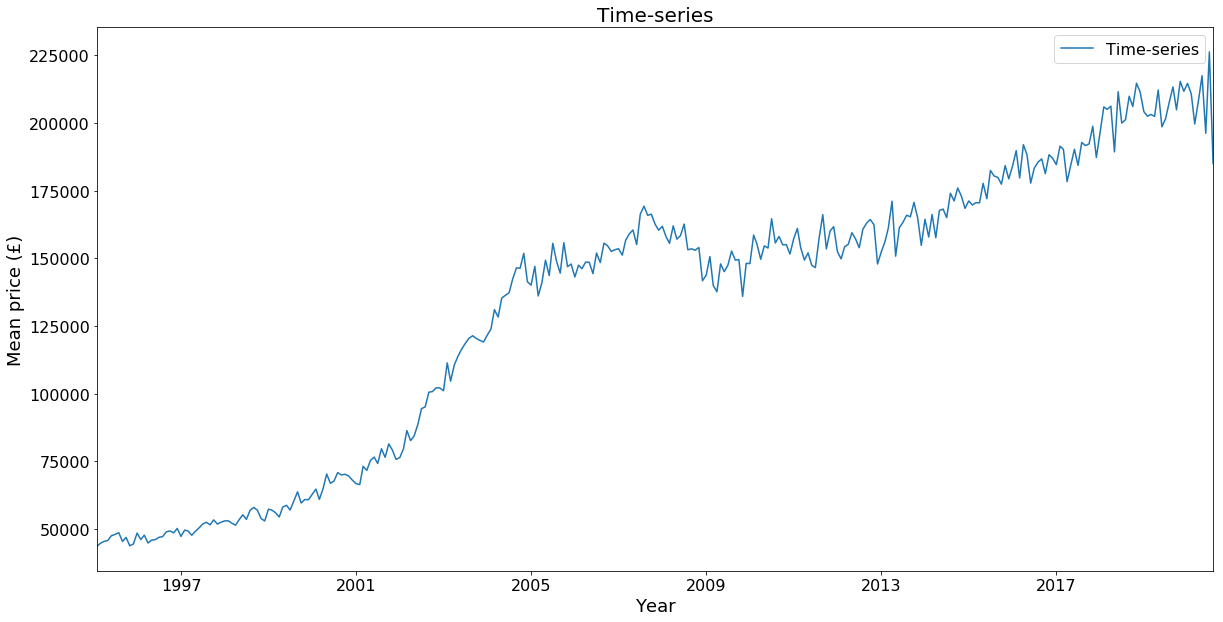

In [138]:
import datetime
import matplotlib.dates as dates
plt.figure(figsize=(20,10))
plt.plot(ts,label='Time-series')
plt.xlim(dates.date2num([ts.index[0], ts.index[-1]]))
plt.xlabel("Year", fontsize='18')
plt.ylabel("Mean price (£)", fontsize='18')
plt.title("Time-series", fontsize='20')

plt.legend(loc='best')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.show()

No handles with labels found to put in legend.
C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


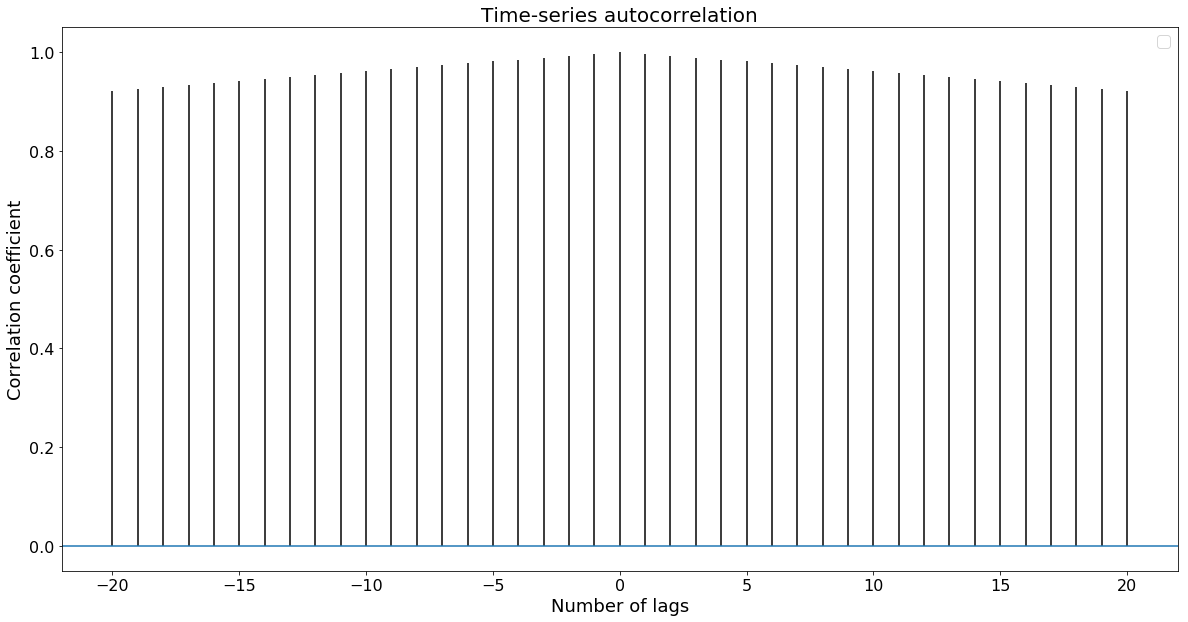

In [124]:
plt.figure(figsize=(20,10))
plt.acorr(x=ts.values,data=ts,maxlags=20)
plt.xlabel("Number of lags", fontsize='18')
plt.ylabel("Correlation coefficient", fontsize='18')
plt.title("Time-series autocorrelation", fontsize='20')

plt.legend(loc='best')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.show()


No handles with labels found to put in legend.
C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


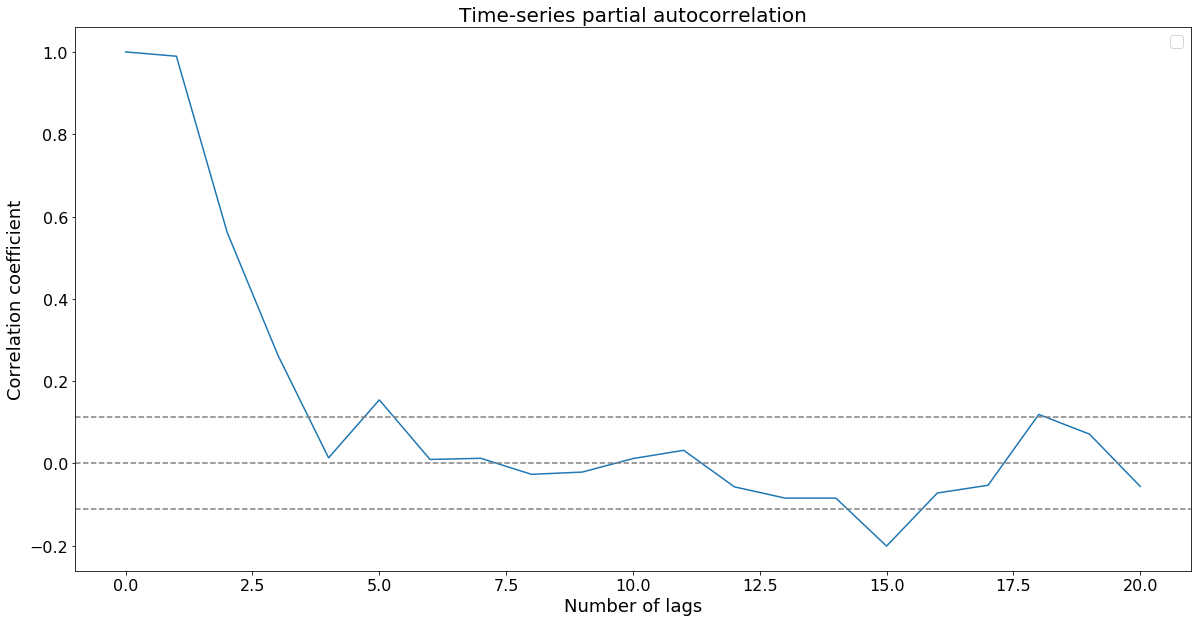

In [132]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

lag_pacf=pacf(ts, nlags=20, method='ols')

#plot ACF
plt.figure(figsize=(20,10))
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)), linestyle='--', color='gray')
plt.xlabel("Number of lags", fontsize='18')
plt.ylabel("Correlation coefficient", fontsize='18')
plt.title("Time-series partial autocorrelation",fontsize='20')
plt.legend(loc='best')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.show()


In [16]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
#Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
#Plot rolling statistics:
    plt.figure(figsize=(40,20))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
#Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

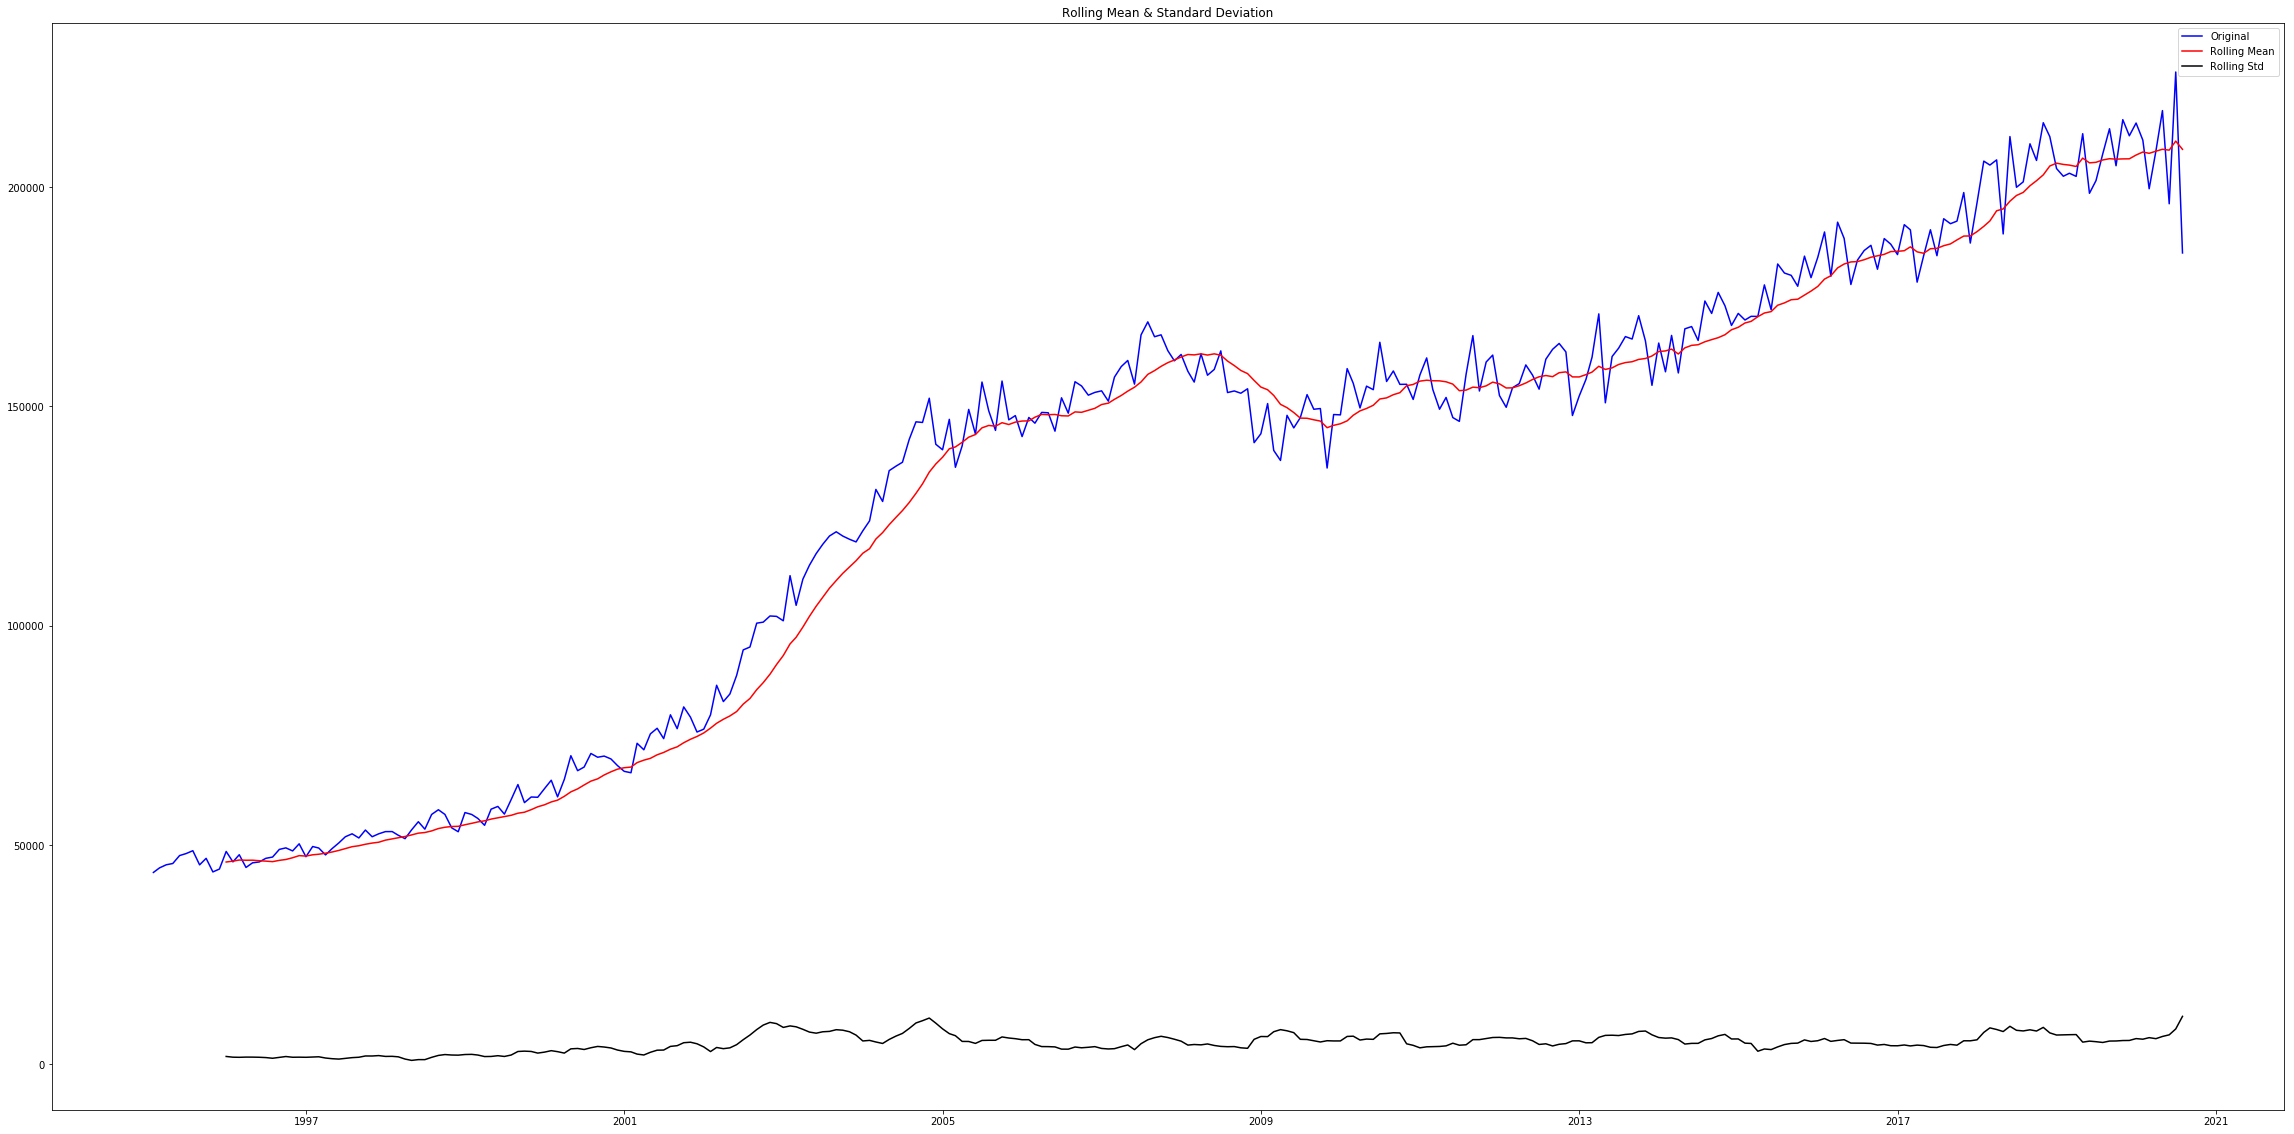

Results of Dickey-Fuller Test:
Test Statistic                  -1.051309
p-value                          0.734094
#Lags Used                       4.000000
Number of Observations Used    302.000000
Critical Value (1%)             -3.452190
Critical Value (5%)             -2.871158
Critical Value (10%)            -2.571895
dtype: float64


In [17]:

test_stationarity(ts)

Time series is not stationary:
- the mean is increasing over time even though the standard deviation is small
- The test statistic is greater thann all critical values, hence we cannot reject the null hypothesis of the data is not stationary at the 99%,95% or 90% level of significance


C:\Users\Rory\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


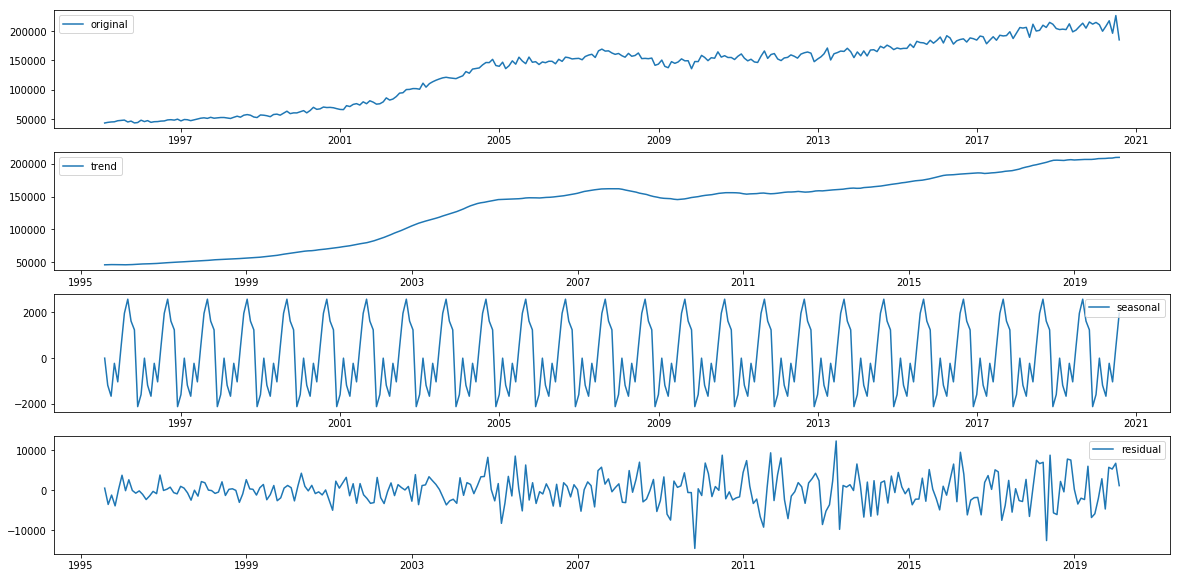

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposistion=seasonal_decompose(ts,freq=12)

trend=decomposistion.trend
seasonal=decomposistion.seasonal
residual=decomposistion.resid
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(ts,label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')


The trend shows that house prices increased at a much quicker rate from 1995-2005 than onwards from 2005, where the rate of increased slowed down and even decreased slightly during 2009 (credit crunch). From 2013 house prices slowly start to increase once more.

C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


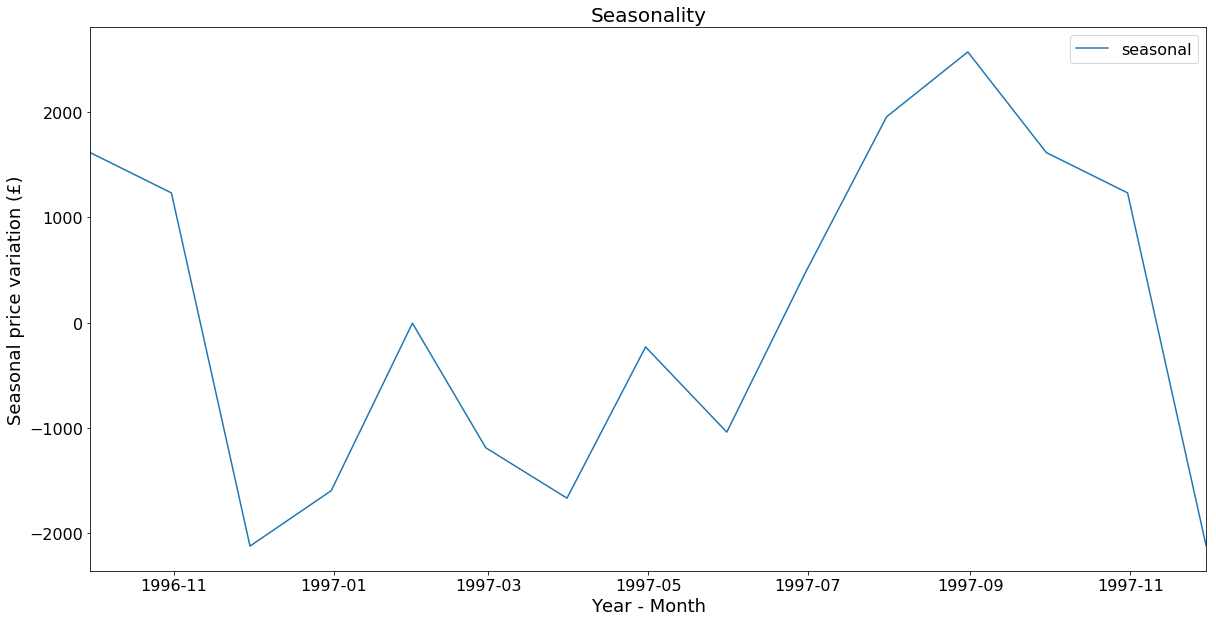

In [143]:
import datetime
import matplotlib.dates as dates
plt.figure(figsize=(20,10))
plt.plot(seasonal,label='seasonal')
plt.xlim(dates.date2num([seasonal.index[20], seasonal.index[34]]))
plt.xlabel("Year - Month", fontsize='18')
plt.ylabel("Seasonal price variation (£)", fontsize='18')
plt.title("Seasonality", fontsize='20')

plt.legend(loc='best')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.show()

There is a obvious seasonal trend in the data, with peak prices occuring in August and the lowest during December. Who wants to move house during Christmas time?

In [141]:
#Train-test split, 20 years of training data and 5 years of test data
ts_train=ts[ts.index[0]:( ts.index[ts.index.get_loc('2015-7-30', method='nearest')])]
ts_test=ts[ ts.index[ts.index.get_loc('2015-7-30', method='nearest')]:ts.index[-1]]

The seasonal decomposition method has provided the best results in the Dickey-Fuller test. We can now reject the null hypothesis at a 99% level of confidence. The time-series is now stationary.

In [23]:
# Grid search for optimal SARIMA parameters
from pmdarima.arima import auto_arima
paramsearch=auto_arima(ts_train,start_p=2,d=None,start_q=1,max_p=7,max_d=1,max_q=5,start_P=1
                  ,D=1,start_Q=1,max_P=7,max_D=3,max_Q=7,m=12, trace=True,enforce_stationarity=False)

Performing stepwise search to minimize aic


C:\Users\Rory\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(2,1,1)(1,1,1)[12]             : AIC=inf, Time=2.89 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4820.433, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4716.587, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4666.609, Time=0.32 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4758.847, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4668.068, Time=0.43 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=4668.048, Time=0.78 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4703.919, Time=0.18 sec


C:\Users\Rory\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=6.00 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.70 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=inf, Time=1.05 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.72 sec


C:\Users\Rory\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=2.56 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.53 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]          
Total fit time: 19.048 seconds


C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


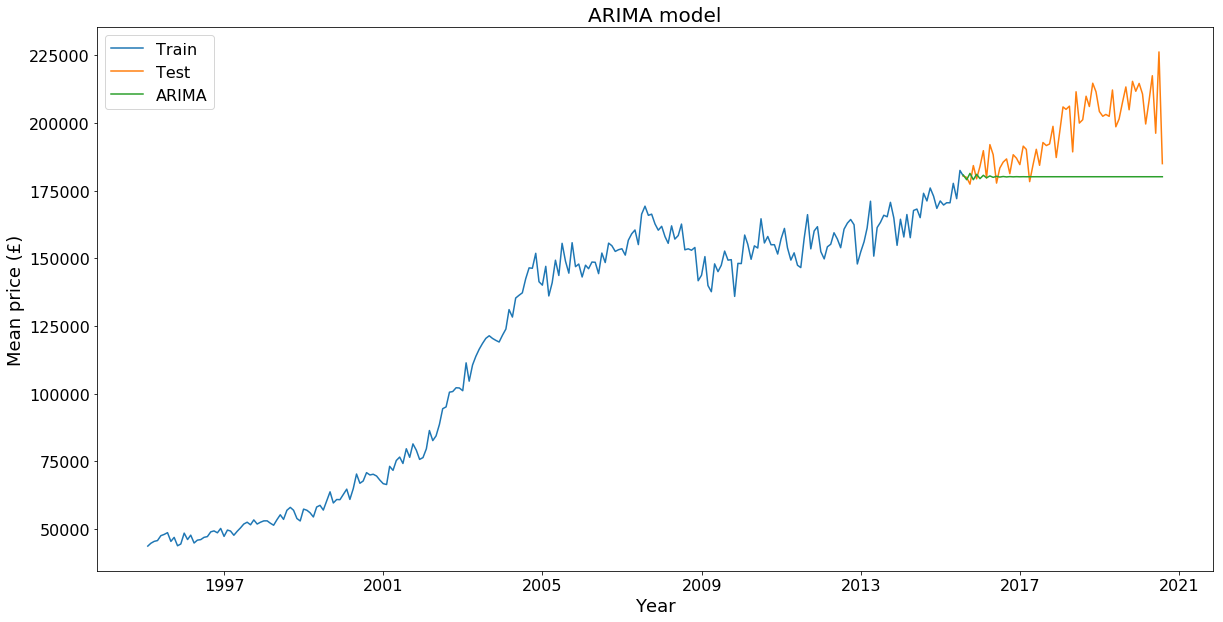

In [145]:
#ARIMA
import statsmodels.api as sm
y_hat_avg = ts_test.copy()
fit1 = sm.tsa.statespace.SARIMAX(ts_train, order=(2, 1, 1),freq='m',seasonal_order=(0,0,0,0)).fit()
y_hat_avg['ARIMA'] = fit1.predict(start=ts_test.index[0],end=ts_test.index[-1])
plt.figure(figsize=(20,10))
plt.plot( ts_train, label='Train')
plt.plot(ts_test, label='Test')
plt.plot(y_hat_avg['ARIMA'], label='ARIMA')
plt.xlabel("Year", fontsize='18')
plt.ylabel("Mean price (£)", fontsize='18')
plt.title("ARIMA model", fontsize='20')

plt.legend(loc='best')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.legend(loc='best')
plt.show()

C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


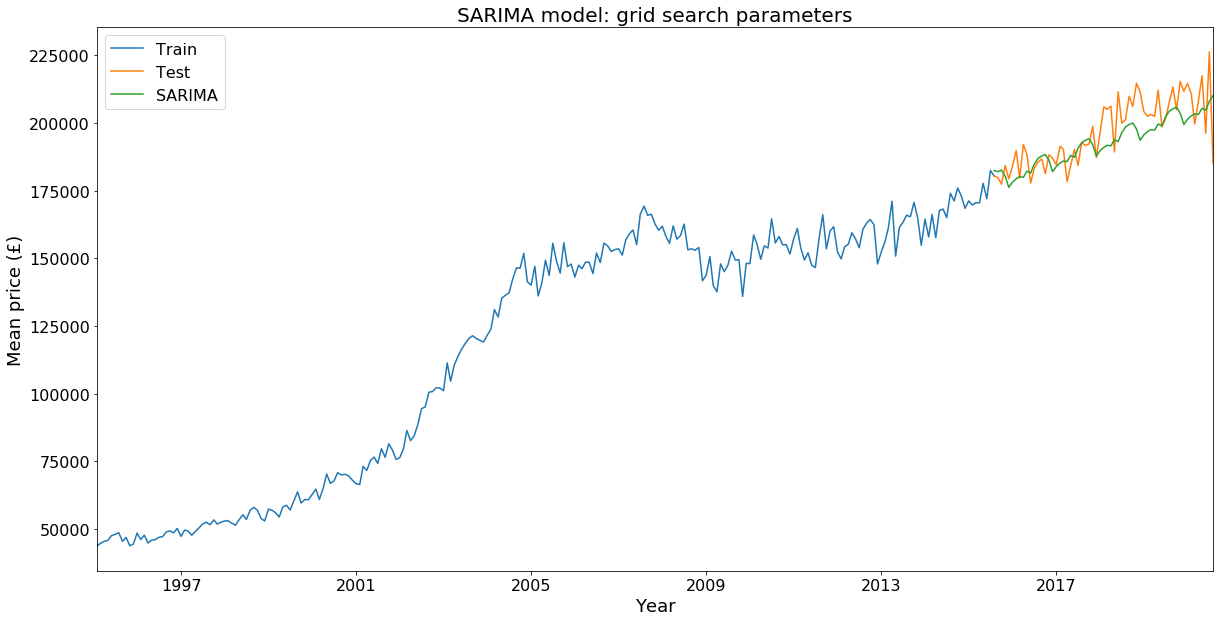

In [157]:
import statsmodels.api as sm
from datetime import datetime
#SARIMA
y_hat_avg = ts_test.copy()
fit2 = sm.tsa.statespace.SARIMAX(ts_train, order=(0, 1, 1),seasonal_order=(0,1,1,12)).fit()
y_hat_avg['SARIMA'] = fit2.predict(start=ts_test.index[0],end=ts_test.index[-1])
plt.figure(figsize=(20,10))
plt.plot( ts_train, label='Train')
plt.plot(ts_test, label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.xlabel("Year", fontsize='18')
plt.xlim(dates.date2num([ts_train.index[0], ts_test.index[-1]]))
plt.ylabel("Mean price (£)", fontsize='18')
plt.title("SARIMA model: grid search parameters", fontsize='20')

plt.legend(loc='best')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.show()

In [46]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                  247
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2330.305
Date:                            Mon, 05 Oct 2020   AIC                           4666.609
Time:                                    11:35:46   BIC                           4676.975
Sample:                                01-31-1995   HQIC                          4670.789
                                     - 07-31-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4219      0.067     -6.282      0.000      -0.554      -0.290
ma.S.L12      -0.8411      0.078    -10.769      0.000      -0.994      -0.688
sigma2      3.644e+07   3.27e-10   1.11e+17      0.000    3.64e+07    3.64e+07
===================================================================================
Ljung-Box (Q):                       43.26   Jarque-Bera (JB):                 9.47
Prob(Q):                              0.33   Prob(JB):                         0.01
Heteroskedasticity (H):               2.86   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [171]:
from sklearn.metrics import mean_squared_error
rms1 = np.sqrt(mean_squared_error(ts_test, y_hat_avg.SARIMA))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rms1, 1)))

The Root Mean Squared Error of our forecasts is 8735.0


C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


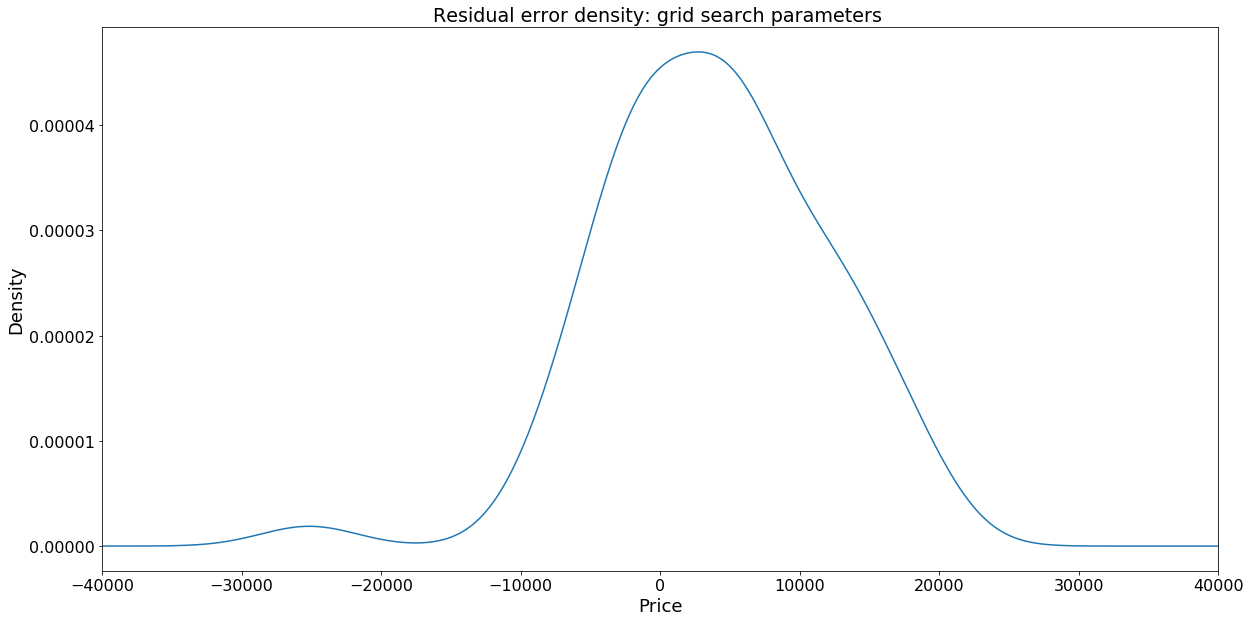

count       61.000000
mean      3842.677726
std       7909.440004
min     -25162.500710
25%      -1391.348788
50%       3892.826278
75%       8657.893132
max      18425.359846
dtype: float64


In [167]:
residuals=ts_test - y_hat_avg['SARIMA']
plt.figure(figsize=(20,10))
residuals.plot(kind='kde')
plt.title('Residual error density: grid search parameters ')
plt.xlabel("Price", fontsize='18')
plt.xlim([-40000,40000])
plt.ylabel("Density", fontsize='18')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.show()
print(residuals.describe())

C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


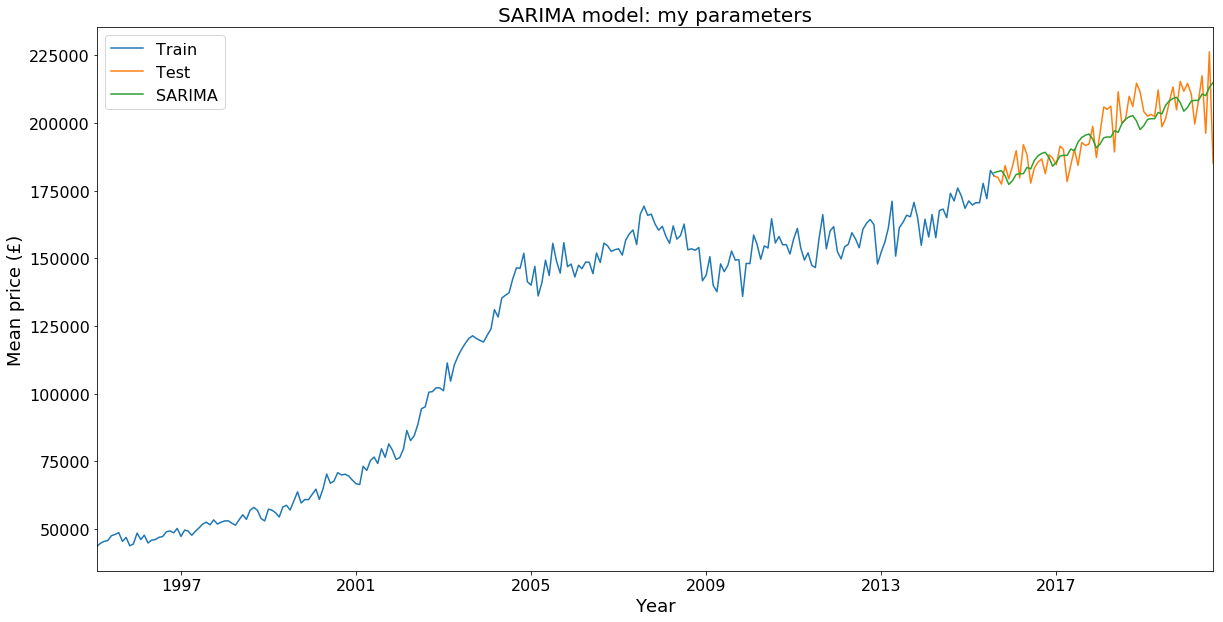

In [158]:
import statsmodels.api as sm
from datetime import datetime
#SARIMA
y_hat_avg1 = ts_test.copy()
fit3 = sm.tsa.statespace.SARIMAX(ts_train, order=(1, 1, 1),seasonal_order=(0,1,1,12)).fit()
y_hat_avg1['SARIMA'] = fit3.predict(start=ts_test.index[0],end=ts_test.index[-1])
plt.figure(figsize=(20,10))
plt.plot( ts_train, label='Train')
plt.plot(ts_test, label='Test')
plt.plot(y_hat_avg1['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.xlabel("Year", fontsize='18')
plt.xlim(dates.date2num([ts_train.index[0], ts_test.index[-1]]))
plt.ylabel("Mean price (£)", fontsize='18')
plt.title("SARIMA model: my parameters", fontsize='20')

plt.legend(loc='best')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.show()

In [172]:
from sklearn.metrics import mean_squared_error
rms2 = np.sqrt(mean_squared_error(ts_test, y_hat_avg1.SARIMA))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rms2, 1)))

The Root Mean Squared Error of our forecasts is 7679.0


C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


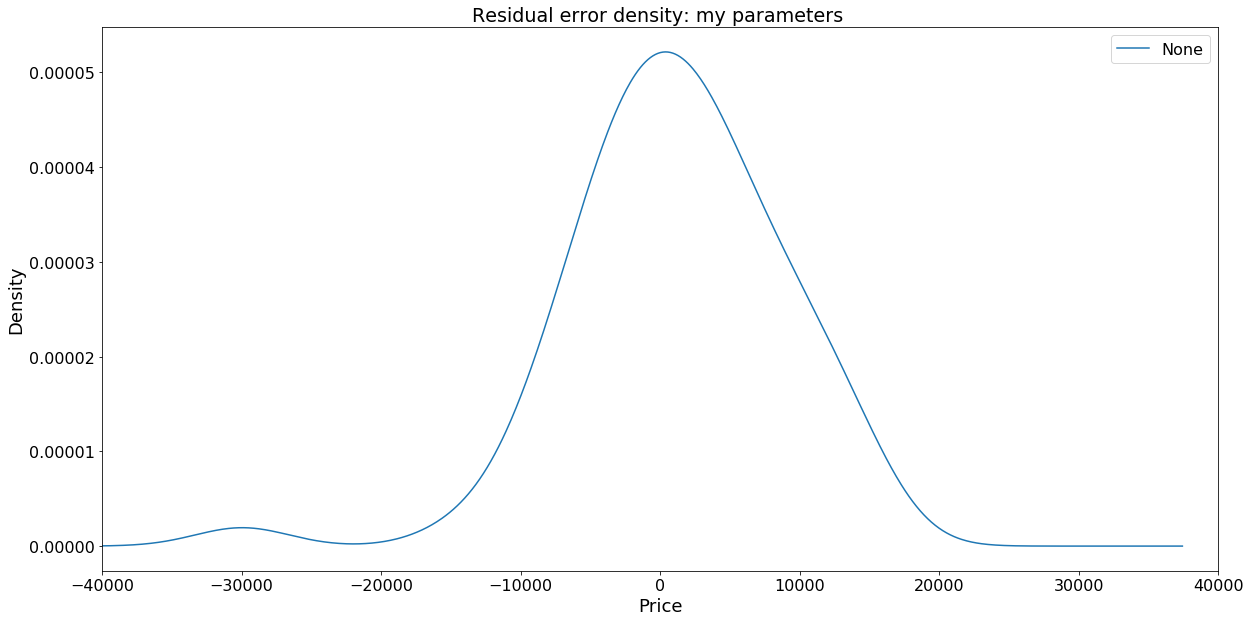

count       61.000000
mean      3842.677726
std       7909.440004
min     -25162.500710
25%      -1391.348788
50%       3892.826278
75%       8657.893132
max      18425.359846
dtype: float64


In [164]:
residuals2=ts_test - y_hat_avg1['SARIMA']
plt.figure(figsize=(20,10))
residuals2.plot(kind='kde')
plt.title('Residual error density: my parameters ')
plt.xlabel("Price", fontsize='18')
plt.xlim([-40000,40000])
plt.ylabel("Density", fontsize='18')
plt.legend(loc='best')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.show()
print(residuals.describe())

Predicting future house prices

In [73]:
#Creating a test date set of future dates
ts_test_future=ts_test
ts_test_future.index=ts_test_future.index+pd.DateOffset(years=5)

In [74]:
ts_test_future

Date
2020-07-31    180424.419476
2020-08-31    179895.297030
2020-09-30    177408.089005
2020-10-31    184273.524229
2020-11-30    179370.612466
                  ...      
2025-03-31    208252.851240
2025-04-30    217461.557692
2025-05-31    196217.968750
2025-06-30    226258.510638
2025-07-31    185000.000000
Name: Price, Length: 61, dtype: float64

C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


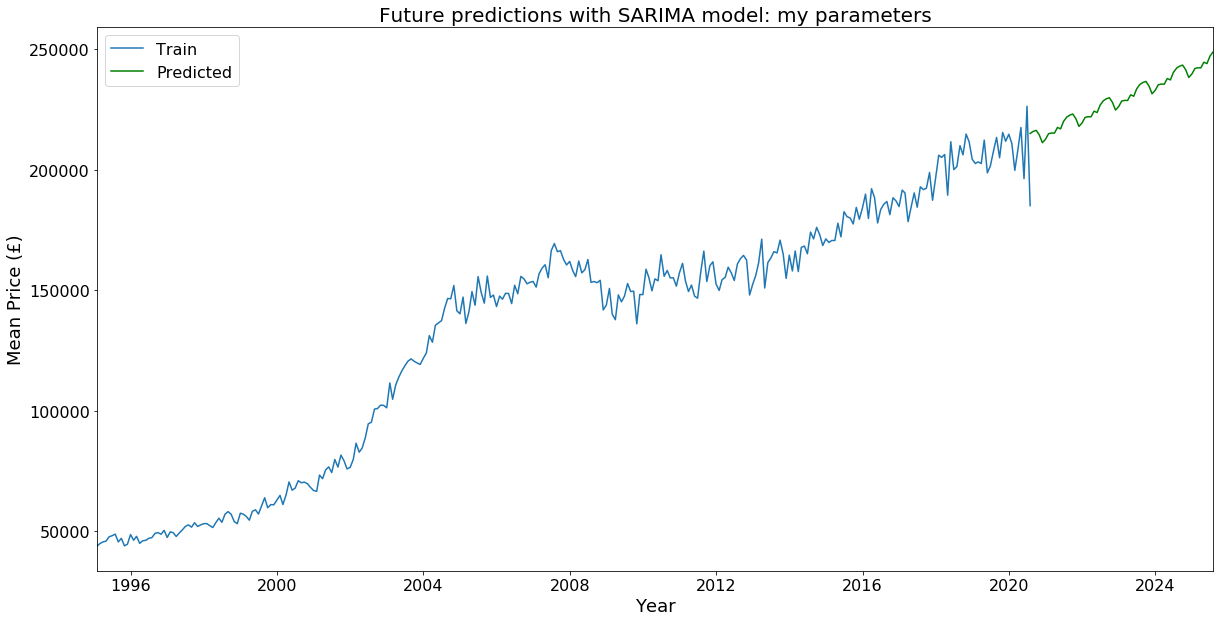

In [161]:
y_hat_avg_future = ts_test_future.copy()
fit_future = sm.tsa.statespace.SARIMAX(ts, order=(1, 1, 1),seasonal_order=(0,1,1,12)).fit()
y_hat_avg_future['SARIMA'] = fit3.predict(start=ts_test_future.index[0],end=ts_test_future.index[-1])
plt.figure(figsize=(20,10))
plt.plot( ts, label='Train')
plt.plot(y_hat_avg_future['SARIMA'], label='Predicted', color='g')
plt.legend(loc='best')
plt.xlabel("Year", fontsize='18')
plt.xlim(dates.date2num([ts_train.index[0], ts_test_future.index[-1]]))
plt.ylabel("Mean Price (£)", fontsize='18')
plt.title("Future predictions with SARIMA model: my parameters", fontsize='20')

plt.legend(loc='best')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.show()